# WeatherPy

***

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" 

In [27]:
# Set the API base 
url = "URLhttps://api.openweathermap.org/data/2.5/weather?" 
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
City not found. Skipping...
Processing Record 2 of Set 1 | walvis bay
City not found. Skipping...
Processing Record 3 of Set 1 | enewetak
City not found. Skipping...
Processing Record 4 of Set 1 | dois vizinhos
City not found. Skipping...
Processing Record 5 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 6 of Set 1 | carnarvon
City not found. Skipping...
Processing Record 7 of Set 1 | ola
City not found. Skipping...
Processing Record 8 of Set 1 | hawaiian paradise park
City not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 10 of Set 1 | chul'man
City not found. Skipping...
Processing Record 11 of Set 1 | ilulissat
City not found. Skipping...
Processing Record 12 of Set 1 | tura
City not found. Skipping...
Processing Record 13 of Set 1 | olonkinbyen
City not found. Skipping...
Processing Record 14 of Set

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,15.46,94,100,0.89,NZ,1706907505
1,walvis bay,-22.9575,14.5053,18.94,95,100,2.11,NA,1706907615
2,enewetak,11.3474,162.3373,26.46,84,100,10.55,MH,1706907618
3,dois vizinhos,-25.7336,-53.0572,27.34,58,50,1.84,BR,1706907457
4,port-aux-francais,-49.3500,70.2167,7.28,99,89,8.44,TF,1706907619


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("WeatherPy_Output/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("WeatherPy_Output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,15.46,94,100,0.89,NZ,1706907505
1,walvis bay,-22.9575,14.5053,18.94,95,100,2.11,NaN,1706907615
2,enewetak,11.3474,162.3373,26.46,84,100,10.55,MH,1706907618
3,dois vizinhos,-25.7336,-53.0572,27.34,58,50,1.84,BR,1706907457
4,port-aux-francais,-49.3500,70.2167,7.28,99,89,8.44,TF,1706907619


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

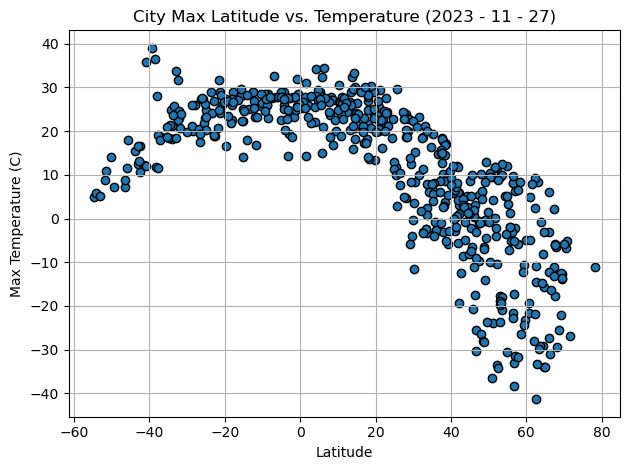

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023 - 11 - 27)")
plt.tight_layout()

# Save the figure
plt.savefig("WeatherPy_Output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

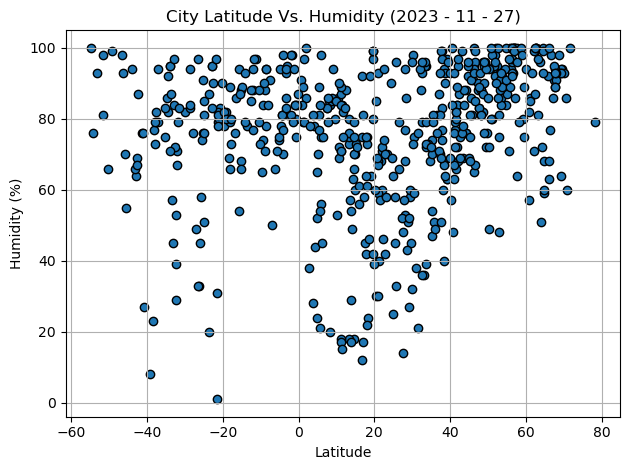

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs. Humidity (2023 - 11 - 27)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("WeatherPy_Output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

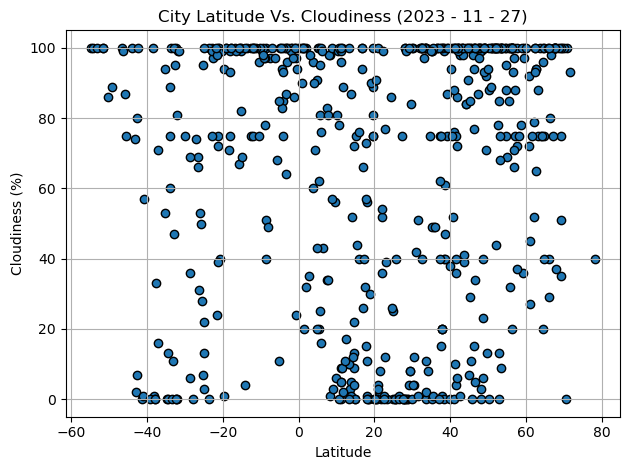

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs. Cloudiness (2023 - 11 - 27)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("WeatherPy_Output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

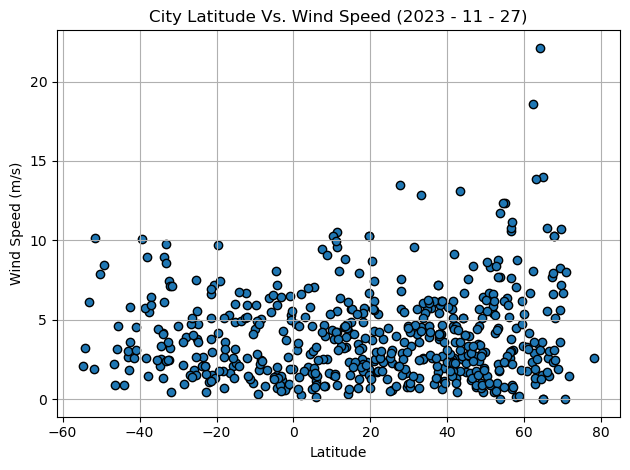

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs. Wind Speed (2023 - 11 - 27)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("WeatherPy_Output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,enewetak,11.3474,162.3373,26.46,84,100,10.55,MH,1706907618
6,ola,59.5833,151.2833,-23.21,75,100,3.35,RU,1706907621
7,hawaiian paradise park,19.5933,-154.9731,23.28,97,100,6.69,US,1706907621
9,chul'man,56.8479,124.9104,-38.34,100,100,0.63,RU,1706907623
10,ilulissat,69.2167,-51.1000,-21.99,64,75,8.23,GL,1706907624


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,15.46,94,100,0.89,NZ,1706907505
1,walvis bay,-22.9575,14.5053,18.94,95,100,2.11,NaN,1706907615
3,dois vizinhos,-25.7336,-53.0572,27.34,58,50,1.84,BR,1706907457
4,port-aux-francais,-49.3500,70.2167,7.28,99,89,8.44,TF,1706907619
5,carnarvon,-24.8667,113.6333,23.92,85,13,4.73,AU,1706907600


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6632506265802428


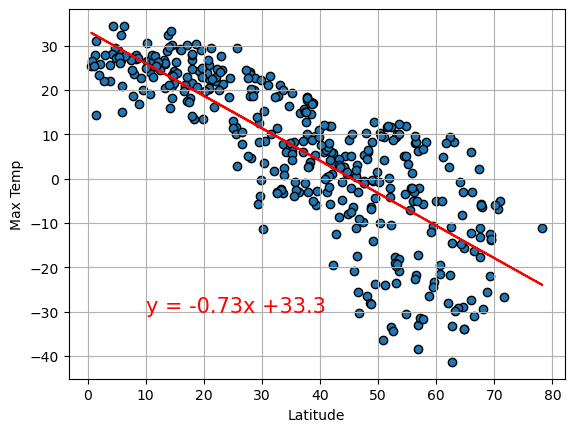

In [15]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (10,-30), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("WeatherPy_Output/Fig5.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.33270308684718347


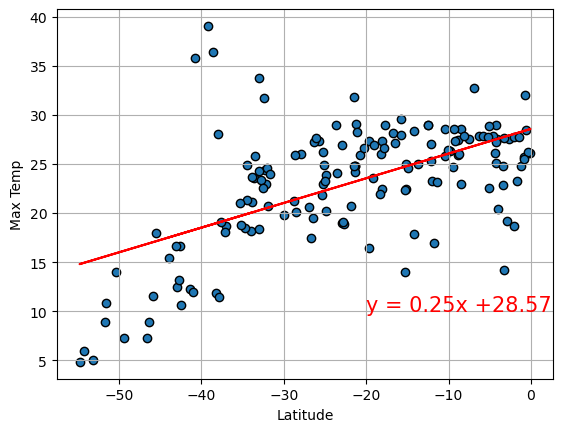

In [16]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (-20,10), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("WeatherPy_Output/Fig6.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1863656302598571


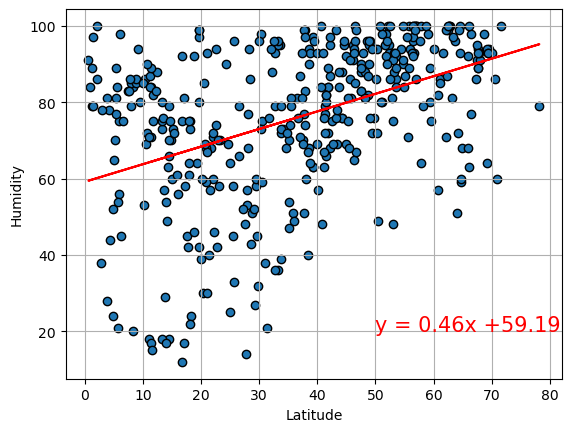

In [17]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (50,20), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("WeatherPy_Output/Fig7.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.030661664076555867


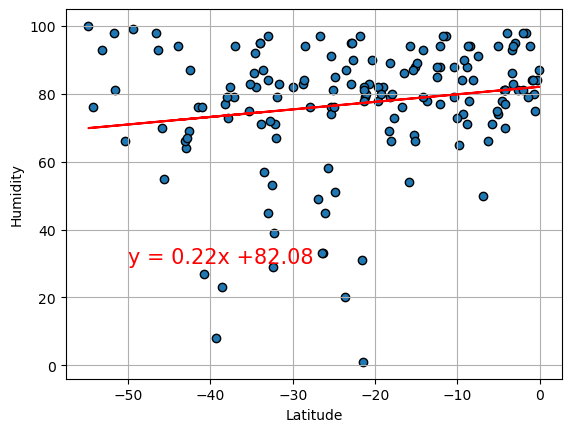

In [18]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (-50,30), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("WeatherPy_Output/Fig8.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09173620022916144


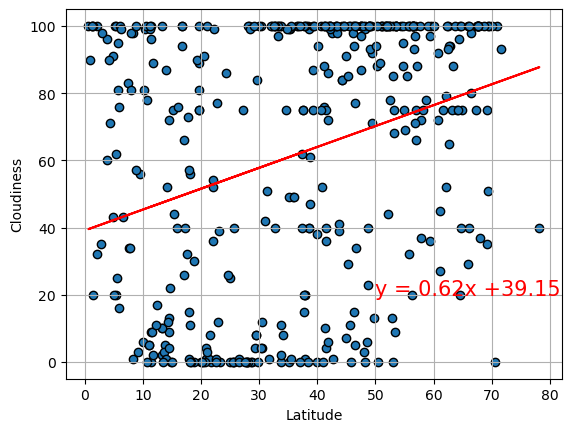

In [19]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (50,20), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("WeatherPy_Output/Fig9.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.09037087414974196


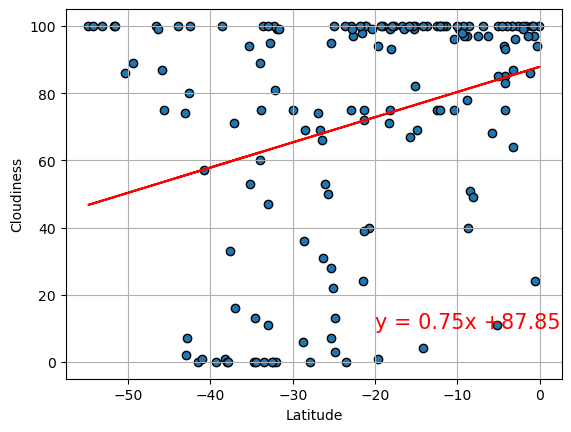

In [20]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (-20,10), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("WeatherPy_Output/Fig10.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.016552476991678146


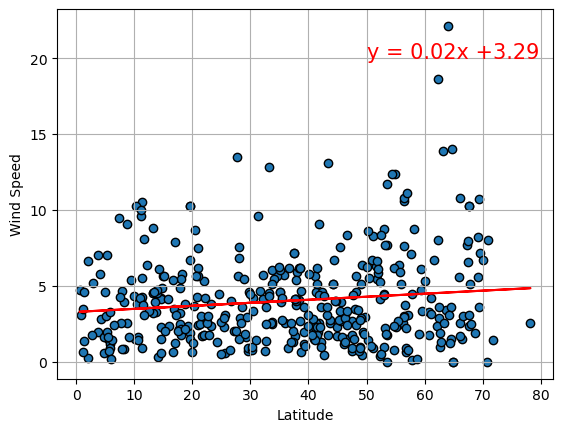

In [21]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (50,20), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("WeatherPy_Output/Fig11.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.03072404396762549


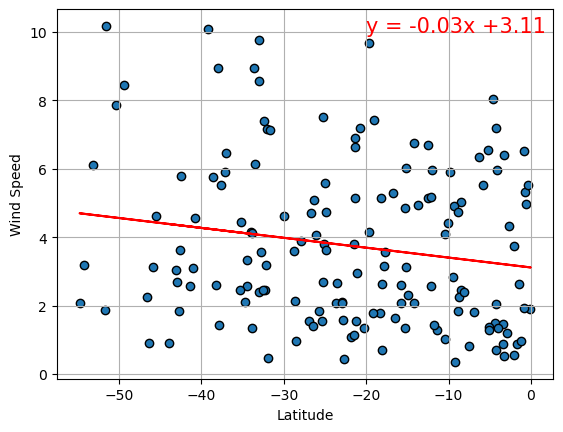

In [22]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderror) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker='o', edgecolors='k')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (-20,10), fontsize=15, color="red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("WeatherPy_Output/Fig12.png")

# Print r value
print(f"The r-value is: {rvalue**2}")